# 🎵 Timbre-Based Audio Segmentation
This notebook analyzes audio based on timbre features like MFCCs and uses them for segmentation.

In [2]:
# 📦 Imports

import os
os.environ["OMP_NUM_THREADS"] = "1"

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans


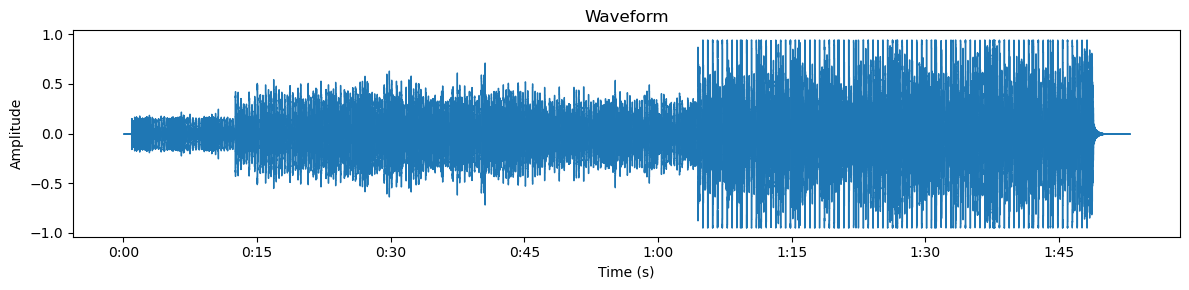

In [3]:
# 🔊 Load Audio File
audio_path = 'DO NOT TOUCH/Audio Files/Emmanuel/01. Vitalic - Polkamatic.flac'  # Change this to your actual file name
y, sr = librosa.load(audio_path, sr=None)

# Display waveform
plt.figure(figsize=(12, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()


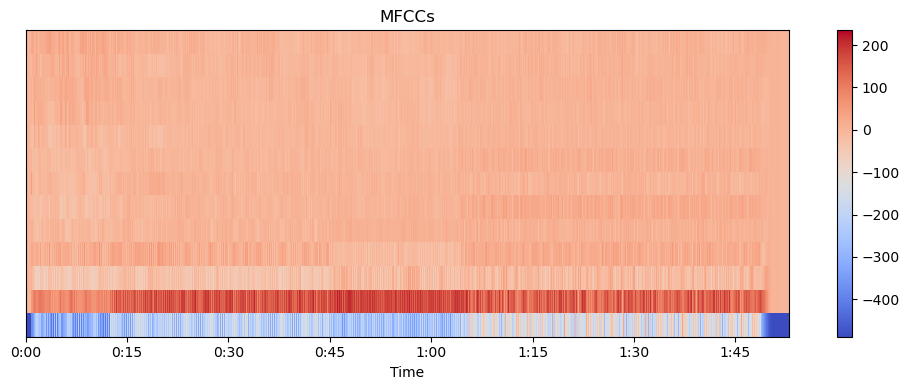

In [4]:
# 🎛️ Extract Timbre Features (MFCCs)
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time', sr=sr)
plt.colorbar()
plt.title("MFCCs")
plt.tight_layout()
plt.show()


In [5]:
# 🥁 Beat Tracking and Synchronization
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
mfcc_sync = librosa.util.sync(mfcc, beats)

print(f"Estimated tempo: {tempo[0]:.2f} BPM")


Estimated tempo: 109.96 BPM


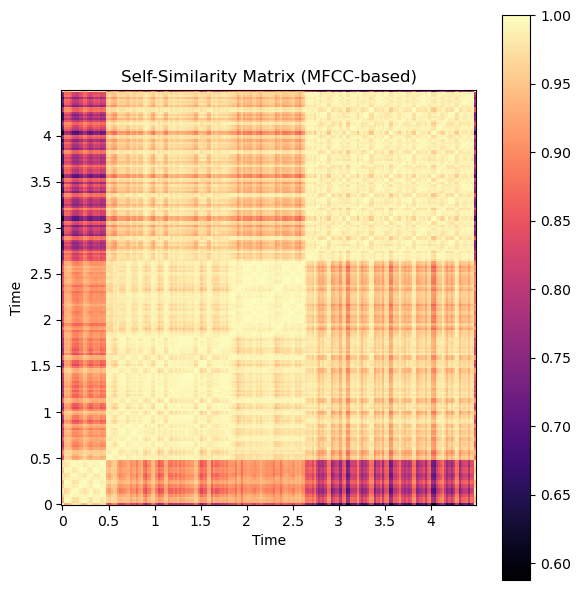

In [6]:
# 🔁 Self-Similarity Matrix from MFCCs
ssm = 1 - cdist(mfcc_sync.T, mfcc_sync.T, metric='cosine')

plt.figure(figsize=(6, 6))
librosa.display.specshow(ssm, x_axis='time', y_axis='time', cmap='magma')
plt.title("Self-Similarity Matrix (MFCC-based)")
plt.colorbar()
plt.tight_layout()
plt.show()


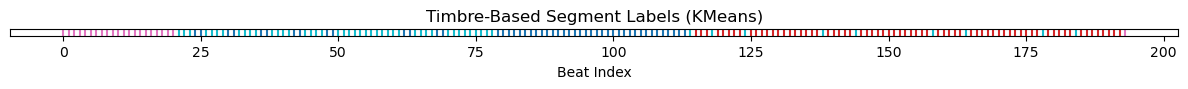

In [7]:
# 📊 Simple Segmentation using KMeans Clustering
n_segments = 4  # You can change this number
kmeans = KMeans(n_clusters=n_segments, random_state=0).fit(mfcc_sync.T)
labels = kmeans.labels_

# Plot cluster assignments
plt.figure(figsize=(12, 1))
plt.scatter(np.arange(len(labels)), np.ones_like(labels), c=labels, cmap='tab10', marker='|', s=200)
plt.title("Timbre-Based Segment Labels (KMeans)")
plt.yticks([])
plt.xlabel("Beat Index")
plt.tight_layout()
plt.show()
